In [145]:
import kipp_plotbib

In [142]:
import numpy as np

In [149]:
import re

In [182]:
import matplotlib.pyplot as plt

In [205]:
from matplotlib.backends.backend_pdf import PdfPages

In [207]:
save_prefix = "/Users/kipp/STB/weyl_figures/Weyl_figures/"

In [147]:
def replacer(key,keymin,keymax,keystep,prefix,seedfname):
	keyarr = np.linspace(keymin,keymax,keystep)
	for num,val in enumerate(keyarr):
		with open(prefix + seedfname + '.cfg','rt') as fin:
			with open(prefix + seedfname + '_' + key +"_{:02}.cfg".format(num), "wt") as fout:	
				for line in fin:
					#print(re.search('(?<=' + key + '\s=\s)',line))
					line = re.sub('(?<=' + key + '\s=\s)',"{:1.6f}".format(val),line)
					line = re.sub('(?<=' + seedfname + ')','_' + key + "_{:02}".format(num),line)
					#line = line.replace(key, "{:1.6f}".format(val))
					#line = line.replace(seedfname,seedfname + "_{:02}".format(num))
					fout.write(line)

In [177]:
prefix = "/Users/kipp/STB/inis/"
theta = np.load(prefix + "m_theta.npy")
seedfname = "path_rel_G-K-Kprime"
Hankepath = '/Users/kipp/HankeCode/output/tbcode/out_rashbabands_09'
stbpathzero = '/Users/kipp/STB/output/path_rel_G-K-Kprime_ferro_phi_00'
stbpathpihalf = '/Users/kipp/STB/output/path_rel_G-K-Kprime_ferro_phi_01'
stbpathpi = '/Users/kipp/STB/output/path_rel_G-K-Kprime_ferro_phi_02'

In [141]:
keyword = 'ferro_phi'
keyword2 = 't_so'
keyword3 = 'lambda'

In [227]:
replacer(key = keyword,keymin = 0,keymax = np.pi,keystep = 7,seedfname  = seedfname,prefix = prefix)

In [229]:
ESTBzero = np.load(stbpathzero + '/band_E.npy')
ESTBpihalf = np.load(stbpathpihalf + '/band_E.npy')
ESTBpi = np.load(stbpathpi + '/band_E.npy')
EHankezero = np.load(Hankepath + '/band_E.npy')[:4,1:899]

In [190]:
def calc_tick_pos(n_sec, pts_per_sec):
	ticks = np.zeros(n_sec+1)
	for i in range(n_sec + 1):
        	ticks[i] = (pts_per_sec - 1) * i
	return ticks

In [191]:
ticks = calc_tick_pos(3,300)
label = ["$\Gamma$", "$K^{'}$", "K", "$\Gamma$"]

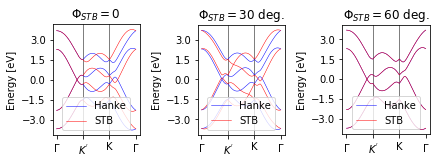

In [230]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,constrained_layout = True)
k = np.arange(0,ESTBzero.shape[1])
#axis1.plot(k,ESTB[3],'b',lw = 0.5,label = 'STB')
#axis1.plot(k,EHanke[3],'r',lw = 0.5, label = "Hanke")
anglestrings = ['0','30 deg.','60 deg.']
labels = ['STB','Hanke']
for j in range(3):
    ax[j].set_aspect(150)
    ax[j].set_xticks(ticks)
    ax[j].set_xticklabels(label)
    ax[j].set_ylabel('Energy [eV]')
    ax[j].set_yticks(np.linspace(-4.5,4.5,7))
    ax[j].set_title('$\Phi_{STB} = $' + anglestrings[j])
    ax[j].axvline(ticks[1],color = 'k',linewidth = '0.5')
    ax[j].axvline(ticks[2],color = 'k',linewidth = '0.5')
    handles, labels = plt.gca().get_legend_handles_labels()
    labels, ids = np.unique(labels, return_index=True)
    handles = [handles[i] for i in ids]
    plt.legend(handles, labels, loc='best')
    for l in range(4):
        ax[j].plot(k,EHankezero[l], 'b',lw = 0.5,label = 'Hanke')

    
for j in range(4):
    ax[0].plot(k,ESTBzero[j],'r',lw=0.5,label = 'STB')
    ax[1].plot(k,ESTBpihalf[j],'r',lw=0.5,label = 'STB')
    ax[2].plot(k,ESTBpi[j],'r',lw=0.5,label = 'STB')
handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]    
for j in range(3):
    ax[j].legend(handles, labels, loc='lower center')
#for j in range(4):
#    axis2.plot(k,ESTB[j] - EHanke[j],lw = 0.5,label = 'band no. {}'.format(j+1))
#axis1.legend()
#axis2.legend()
with PdfPages(save_prefix + '2019-02-22_1_compare_STB_Hanke_phi.pdf') as pdf:
    pdf.savefig(fig)